In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stock = "VNA.DE"


In [3]:
t = yf.Tickers(stock)

### Dividents

In [4]:
df_div = t.tickers[stock].dividends

In [5]:
print(f"type:{type(df_div)}")

type:<class 'pandas.core.series.Series'>


In [6]:
df_div.head(8)

Date
2014-05-12 00:00:00+02:00    0.468082
2015-05-04 00:00:00+02:00    0.521577
2016-05-13 00:00:00+02:00    0.749755
2017-05-17 00:00:00+02:00    0.893325
2018-05-10 00:00:00+02:00    1.052848
2019-05-17 00:00:00+02:00    1.148561
2020-05-14 00:00:00+02:00    1.570000
2020-07-01 00:00:00+02:00    1.252251
Name: Dividends, dtype: float64

In [7]:
dates= df_div.index.date

In [8]:
dates[0]

datetime.date(2014, 5, 12)

### Stock Price

In [22]:
df_sp = yf.download(
        tickers = stock,
        period = "max",
        interval = "1d",
        group_by = 'ticker',
        prepost = False,
        repair = True
        )

VNA.DE: fixed 33/95 value=0 errors in 1h price data
VNA.DE: fixed 19/19 value=0 errors in 1d price data
[*********************100%***********************]  1 of 1 completed


In [23]:
df_sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-11,14.336004,14.755185,14.310853,14.713267,10.688135,3899256
2013-07-12,14.688116,15.065379,14.671349,14.755185,10.718585,540935
2013-07-15,14.839021,15.124065,14.713267,15.124065,10.986550,382730
2013-07-16,15.233052,15.509712,15.065379,15.090530,10.962189,289282
2013-07-17,15.300121,15.300121,15.006694,15.216285,11.053542,1223409


In [24]:
df_sp.index

DatetimeIndex(['2013-07-11', '2013-07-12', '2013-07-15', '2013-07-16',
               '2013-07-17', '2013-07-18', '2013-07-19', '2013-07-22',
               '2013-07-23', '2013-07-24',
               ...
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06'],
              dtype='datetime64[ns]', name='Date', length=2535, freq=None)

### Joining

In [25]:
div = df_div.copy()
div = pd.DataFrame(div)
sp = df_sp.copy()

In [26]:
div=div.tz_localize(None)
div.index

DatetimeIndex(['2014-05-12', '2015-05-04', '2016-05-13', '2017-05-17',
               '2018-05-10', '2019-05-17', '2020-05-14', '2020-07-01',
               '2021-04-19', '2022-05-02', '2023-05-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [27]:
combined = sp.join(div, lsuffix='_sp', rsuffix='_div')

In [28]:
combined.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends
Date,,,,,,,
2013-07-11,14.336004,14.755185,14.310853,14.713267,10.688135,3899256,NaN
2013-07-12,14.688116,15.065379,14.671349,14.755185,10.718585,540935,NaN
2013-07-15,14.839021,15.124065,14.713267,15.124065,10.986550,382730,NaN
2013-07-16,15.233052,15.509712,15.065379,15.090530,10.962189,289282,NaN
2013-07-17,15.300121,15.300121,15.006694,15.216285,11.053542,1223409,NaN


In [29]:
combined.shape

(2535, 7)

In [30]:
combined.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,11.000000
mean,35.739793,36.079668,35.360399,35.716613,30.007637,1.553424e+06,1.046760
std,12.783412,12.883812,12.687570,12.787032,12.062205,1.513949e+06,0.394252
min,14.336004,14.755185,14.310853,14.713267,10.688135,0.000000e+00,0.468082
25%,26.079370,26.300604,25.748218,26.071542,20.899234,9.252770e+05,0.799878
50%,34.955002,35.174999,34.634998,34.965000,28.435556,1.288238e+06,1.052848
75%,45.639999,46.169998,45.139999,45.580000,38.316311,1.831148e+06,1.300107
max,62.520000,62.740002,61.580002,62.220001,55.440014,2.896657e+07,1.660000


### Graphing

In [31]:
import matplotlib.pyplot as plt # importing the scripting interface
import matplotlib as mpl

%matplotlib inline

In [32]:
annotations = combined[combined['Dividends'].notnull()]

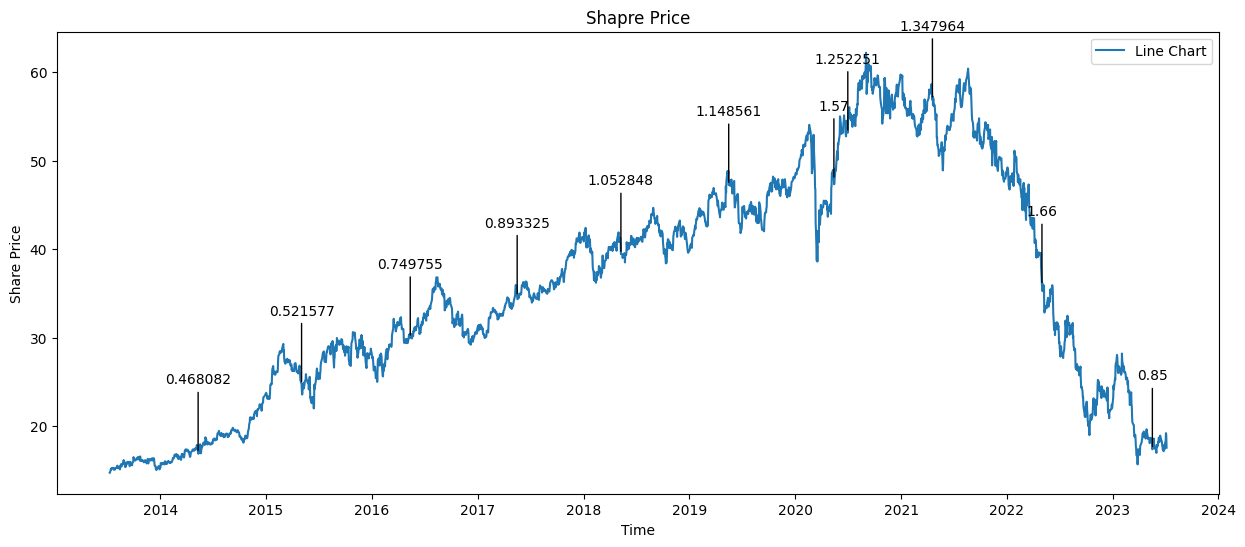

In [33]:

# Create the figure and axes
from numpy import NaN


fig, ax = plt.subplots(figsize=(15, 6))

# Plot the line chart
ax.plot(combined.index, combined.Close, label='Line Chart')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Share Price')
ax.set_title('Shapre Price')

# Add a legend
ax.legend()

# adding x ticker
#ax.set_xticks(combined.index, rotation="vertical")

# Add annotations based on the 'label' column
for i, row in annotations.iterrows():
    x = i
    y = row["Close"]
    label = row['Dividends']
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,50), ha='center',
                arrowprops=dict(arrowstyle = '-', connectionstyle = 'arc3',facecolor='red'))

# Display the plot
plt.show()


In [21]:

# Add annotations based on the 'label' column
for i, row in combined.iterrows():
    x = i
    y = row["Close"]
    label = row['Dividends']
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()